In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
# Load the dataset
file_path = r"C:\Users\iabhi\OneDrive\Desktop\Copy of PCOS_data_without_infertility.xlsx"
pcos_data = pd.read_excel(file_path)

# Drop irrelevant columns
pcos_data = pcos_data.drop(columns=['Sl. No', 'Patient File No.', 'Unnamed: 44'])

# Separate target and features
target = pcos_data['PCOS (Y/N)']
features = pcos_data.drop(columns=['PCOS (Y/N)'])


In [3]:
# Handle missing values
numeric_features = features.select_dtypes(include=[np.number])
categorical_features = features.select_dtypes(exclude=[np.number])

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')
numeric_features = pd.DataFrame(imputer_num.fit_transform(numeric_features), columns=numeric_features.columns)
categorical_features = pd.DataFrame(imputer_cat.fit_transform(categorical_features), columns=categorical_features.columns)

In [4]:
# Encode categorical features
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    categorical_features[column] = le.fit_transform(categorical_features[column].astype(str))
    label_encoders[column] = le

# Combine numeric and categorical features
processed_features = pd.concat([numeric_features, categorical_features], axis=1)

In [5]:
# Feature Selection: Exclude hormonal and biochemical markers
excluded_columns = [
    'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
    'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Follicle No. (L)', 'Follicle No. (R)',
    'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)'
]
non_hormonal_features = processed_features.drop(columns=excluded_columns)

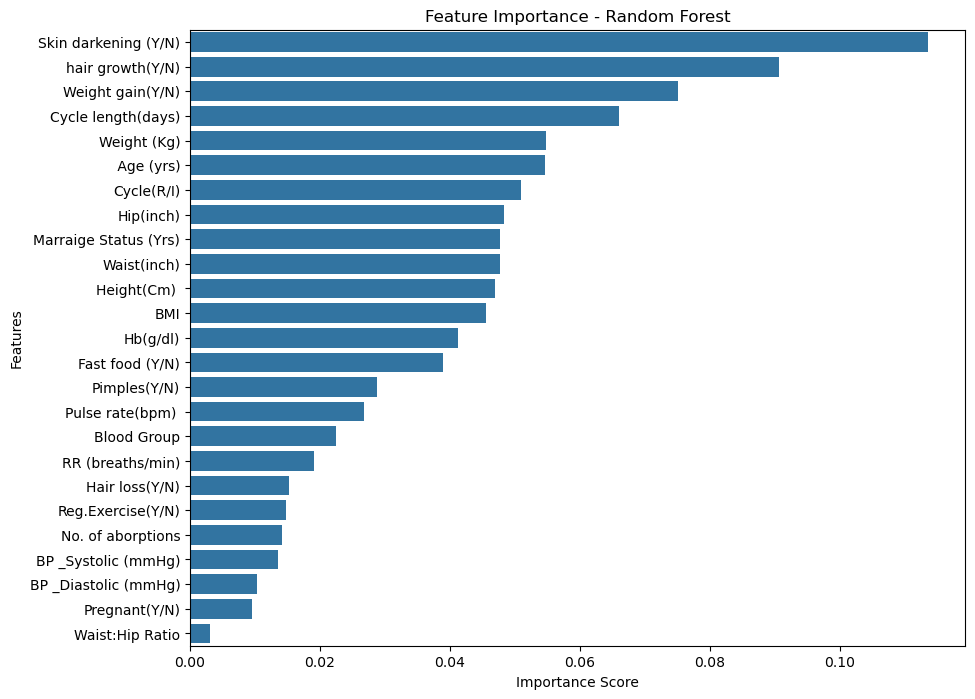

In [6]:

# Train a Random Forest model to calculate feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(non_hormonal_features, target)

# Extract and sort feature importances
feature_importances = pd.DataFrame({
    'Feature': non_hormonal_features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [7]:
# Select top features based on feature importance analysis
non_hormonal_features.columns = non_hormonal_features.columns.str.strip()
top_features = [
    'Skin darkening (Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 
    'Marraige Status (Yrs)', 'Age (yrs)', 'Weight (Kg)', 'Cycle length(days)', 
    'Cycle(R/I)', 'Height(Cm)', 'BMI'
]
X_top_features = non_hormonal_features[top_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_top_features, target, test_size=0.3, random_state=42)

Logistic Regression Results:
Accuracy: 0.8282208588957055
Precision: 0.7777777777777778
Recall: 0.660377358490566
F1 Score: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.78      0.66      0.71        53

    accuracy                           0.83       163
   macro avg       0.81      0.78      0.80       163
weighted avg       0.82      0.83      0.82       163



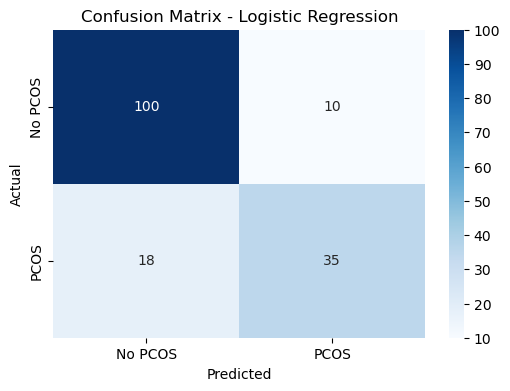

In [8]:
# 1. Logistic Regression Model Training and Evaluation
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_log_reg}")
print(f"Precision: {precision_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"F1 Score: {f1_log_reg}")
print("Classification Report:\n", classification_rep_log_reg)

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [9]:

# Save the Logistic Regression model
log_reg_filename = "logistic_regression_model.pkl"
joblib.dump(log_reg_model, log_reg_filename)
print(f"Logistic Regression model saved as {log_reg_filename}")




Logistic Regression model saved as logistic_regression_model.pkl



Random Forest Results:
Accuracy: 0.7852760736196319
Precision: 0.7142857142857143
Recall: 0.5660377358490566
F1 Score: 0.631578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.71      0.57      0.63        53

    accuracy                           0.79       163
   macro avg       0.76      0.73      0.74       163
weighted avg       0.78      0.79      0.78       163



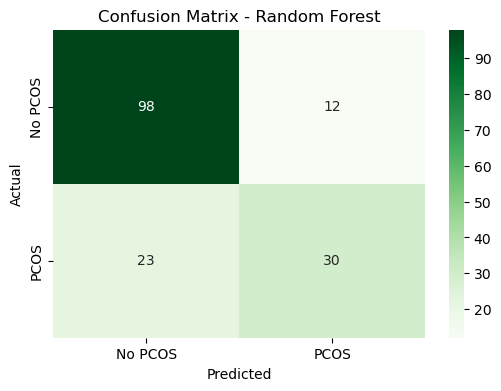

In [10]:
# 2. Random Forest Model Training and Evaluation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print("Classification Report:\n", classification_rep_rf)

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [11]:
# Save the Random Forest model
rf_model_filename = "random_forest_model.pkl"
joblib.dump(rf_model, rf_model_filename)
print(f"Random Forest model saved as {rf_model_filename}")

Random Forest model saved as random_forest_model.pkl


In [13]:
import joblib
import numpy as np

# Load the trained Logistic Regression model
log_reg_model = joblib.load("logistic_regression_model.pkl")

# Function to get user input and calculate BMI
def get_user_input():
    print("Please enter the following information for PCOS prediction:")
    skin_darkening = int(input("Skin Darkening (1 for Yes, 0 for No): "))
    weight_gain = int(input("Weight Gain (1 for Yes, 0 for No): "))
    hair_growth = int(input("Hair Growth (1 for Yes, 0 for No): "))
    marriage_years = float(input("Years of Marriage: "))
    age = float(input("Age: "))
    weight = float(input("Weight (Kg): "))
    height = float(input("Height (Cm): "))
    cycle_length = float(input("Cycle Length (days): "))
    cycle_regular = int(input("Cycle Regularity (1 for Regular, 0 for Irregular): "))

    # Calculate BMI (weight in kg / (height in meters)^2)
    height_m = height / 100  # Convert height from cm to meters
    bmi = weight / (height_m ** 2)
    print(f"Calculated BMI: {bmi:.2f}")

    # Create a numpy array from the inputs, excluding direct BMI input
    user_data = np.array([[skin_darkening, weight_gain, hair_growth, marriage_years, age, 
                           weight, cycle_length, cycle_regular, height, bmi]])
    return user_data

# Get user data
user_data = get_user_input()

# Make a prediction
prediction = log_reg_model.predict(user_data)

# Output the result
if prediction[0] == 1:
    print("Prediction: The model predicts that the user has PCOS.")
else:
    print("Prediction: The model predicts that the user does not have PCOS.")


Please enter the following information for PCOS prediction:


Skin Darkening (1 for Yes, 0 for No):  0
Weight Gain (1 for Yes, 0 for No):  0
Hair Growth (1 for Yes, 0 for No):  1
Years of Marriage:  0
Age:  19
Weight (Kg):  58
Height (Cm):  162
Cycle Length (days):  28
Cycle Regularity (1 for Regular, 0 for Irregular):  1


Calculated BMI: 22.10
Prediction: The model predicts that the user does not have PCOS.


C:\Users\iabhi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
